## Exploring the Netflix Life Impact Dataset

Source: https://www.kaggle.com/datasets/towhid121/netflix-life-impact-dataset-nlid

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import pingouin as pg

In [2]:
netflix = pd.read_csv("data/Netflix Life Impact Dataset (NLID).csv")

In [3]:
netflix.head()

,Movie Title,Genre,Release Year,Average Rating,Number of Reviews,Review Highlights,Minute of Life-Changing Insight,How Discovered,Meaningful Advice Taken,Suggested to Friends/Family (Y/N %)
0,The Pursuit of Happyness,Drama,2006,9.1,42000,"""Will Smith’s struggle hit hard. A must-watch!...",78:15 – Chris gets the job,Friend suggested,Persistence pays off.,92% Y
1,The Social Dilemma,Documentary,2020,8.2,35000,"""Eye-opening about tech addiction."" / ""Some cl...",12:40 – Algorithm manipulation,Social media,Limit screen time for mental health.,88% Y
2,Parasite,Thriller/Drama,2019,9.3,50000,"""Masterpiece on class inequality."" / ""Too dark...",1:12:00 – The flood scene,Netflix recommendation,Privilege isn’t always visible.,85% Y
3,Paddington 2,Comedy/Family,2017,8.8,28000,"""Pure joy! Teaches kindness effortlessly."" / ""...",33:10 – Paddington’s jail speech,Friend suggested,Always choose kindness.,95% Y
4,Inception,Sci-Fi,2010,9.0,45000,"""Mind-bending brilliance."" / ""Confusing plot.""",1:05:22 – Cobb’s totem scene,Social media,Reality is subjective.,80% Y


In [4]:
netflix.describe()

,Release Year,Average Rating,Number of Reviews
count,82.000000,82.000000,82.000000
mean,2018.304878,7.547561,23146.341463
std,2.365853,1.097160,12796.722141
min,2006.000000,4.000000,8000.000000
25%,2017.250000,6.925000,13000.000000
50%,2019.000000,7.800000,19000.000000
75%,2020.000000,8.300000,31000.000000
max,2021.000000,9.400000,65000.000000


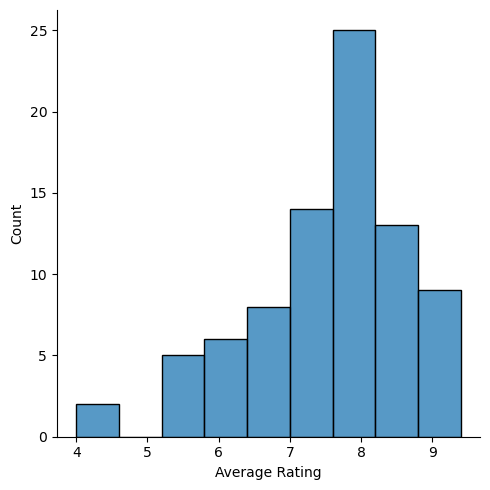

In [5]:
sns.displot(x='Average Rating',data=netflix)

The distribution looks *almost* normal. Let's check it.

In [7]:
pg.normality(netflix['Average Rating'])

,W,pval,normal
Average Rating,0.951122,0.003463,False


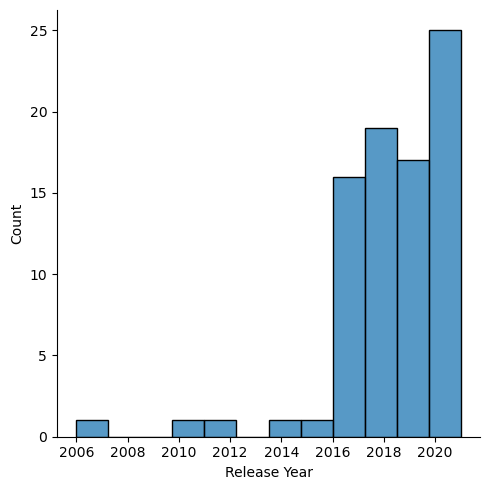

In [8]:
sns.displot(x='Release Year',data=netflix)

Netflix's movie catalog seems more recent.

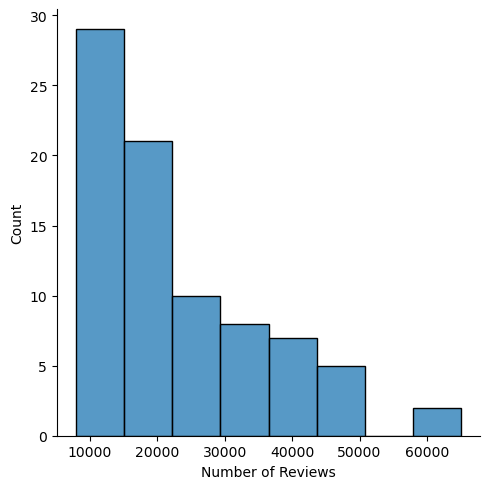

In [9]:
sns.displot(x='Number of Reviews',data=netflix)

Let's compute the range of number of reviews.

In [10]:
netflix['Number of Reviews'].max() - netflix['Number of Reviews'].min()

np.int64(57000)

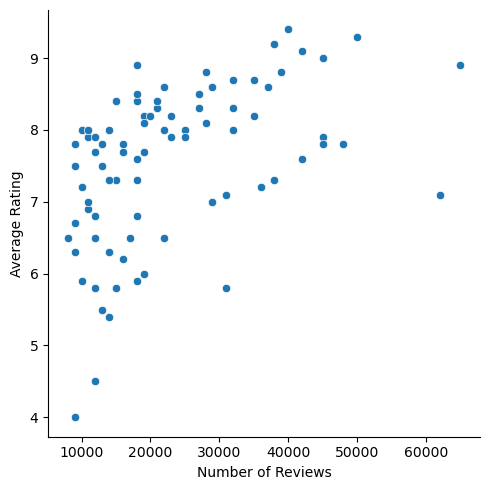

In [11]:
sns.relplot(x='Number of Reviews',y='Average Rating',data=netflix)

<Axes: xlabel='Number of Reviews', ylabel='Average Rating'>

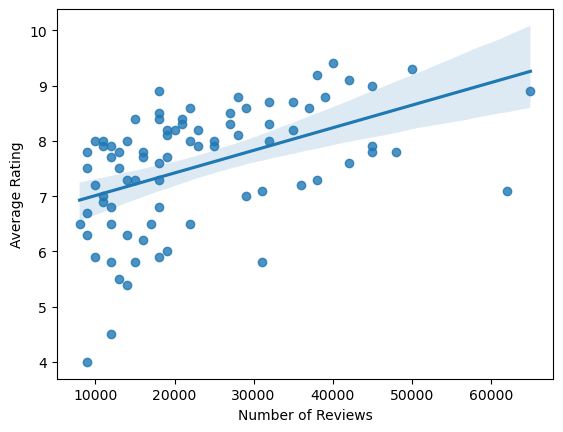

In [12]:
sns.regplot(x='Number of Reviews',y='Average Rating',data=netflix)

In [22]:
pg.linear_regression(netflix['Number of Reviews'],netflix['Average Rating']).round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.6,0.22,29.67,0.0,0.23,0.22,6.16,7.04
1,Number of Reviews,0.0,0.00,4.85,0.0,0.23,0.22,0.00,0.00


In [16]:
pg.corr(netflix['Number of Reviews'],netflix['Average Rating'])

,n,r,CI95%,p-val,BF10,power
pearson,82,0.47688,"[0.29, 0.63]",0.000006,3275.435,0.996285


There's some correlation between number of reviews and rating.

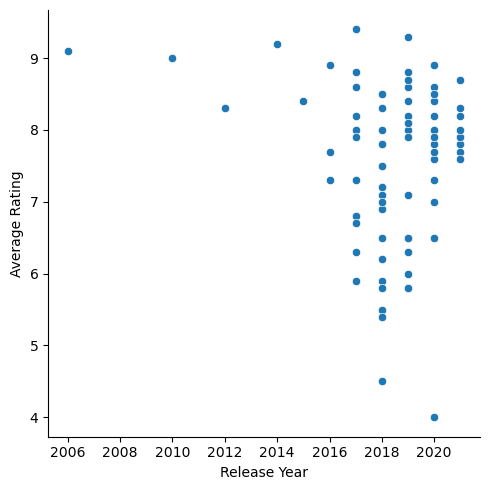

In [19]:
sns.relplot(x='Release Year',y='Average Rating',data=netflix)

<Axes: xlabel='Release Year', ylabel='Average Rating'>

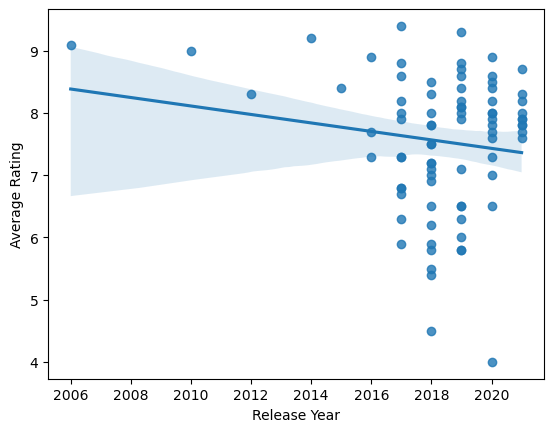

In [20]:
sns.regplot(x='Release Year',y='Average Rating',data=netflix)

In [24]:
pg.linear_regression(netflix['Release Year'],netflix['Average Rating']).round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,145.06,103.51,1.40,0.16,0.02,0.01,-60.94,351.05
1,Release Year,-0.07,0.05,-1.33,0.19,0.02,0.01,-0.17,0.03


In [25]:
pg.corr(netflix['Release Year'],netflix['Average Rating'])

,n,r,CI95%,p-val,BF10,power
pearson,82,-0.146913,"[-0.35, 0.07]",0.187807,0.324,0.262166


Not much linear correlation between release year and rating.

Let's try the Spearman rank correlation:

In [27]:
pg.corr(netflix['Release Year'],netflix['Average Rating'],method='spearman')

,n,r,CI95%,p-val,power
spearman,82,0.016538,"[-0.2, 0.23]",0.88276,0.05231


Still, not much correlation. Let's try multiple regression.

In [28]:
pg.linear_regression(netflix[['Number of Reviews','Release Year']],netflix['Average Rating']).round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,90.49,92.82,0.97,0.33,0.24,0.22,-94.25,275.24
1,Number of Reviews,0.00,0.00,4.70,0.00,0.24,0.22,0.00,0.00
2,Release Year,-0.04,0.05,-0.90,0.37,0.24,0.22,-0.13,0.05


Not a whole lot of correlation, again. I wonder if least-squares curves might be better.

<Axes: xlabel='Release Year', ylabel='Average Rating'>

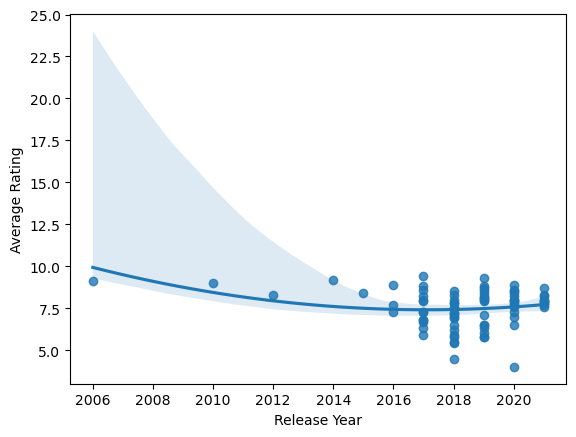

In [4]:
sns.regplot(x='Release Year',y='Average Rating',data=netflix,order=2)

<Axes: xlabel='Release Year', ylabel='Average Rating'>

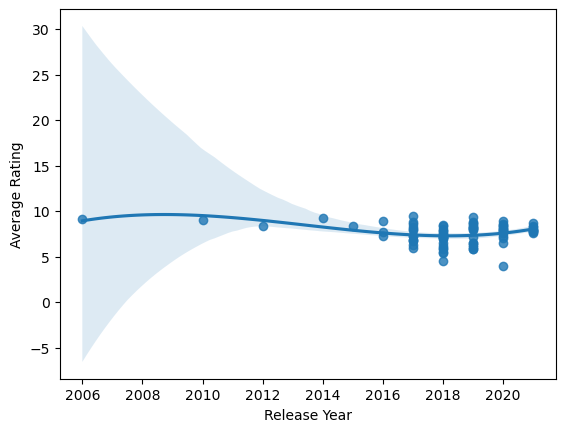

In [5]:
sns.regplot(x='Release Year',y='Average Rating',data=netflix,order=3)

/home/ddelony/miniforge3/envs/stats/lib/python3.13/site-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/home/ddelony/miniforge3/envs/stats/lib/python3.13/site-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


<Axes: xlabel='Release Year', ylabel='Average Rating'>

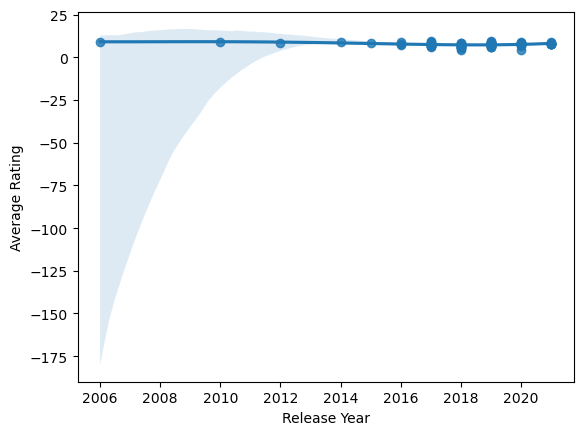

In [6]:
sns.regplot(x='Release Year',y='Average Rating',data=netflix,order=4)

In [9]:
netflix['Release Year2'] = netflix['Release Year']**2
netflix['Release Year3'] = netflix['Release Year']**3

In [13]:
pg.linear_regression(netflix[['Release Year','Release Year2','Release Year3']],netflix['Average Rating'])

/home/ddelony/miniforge3/envs/stats/lib/python3.13/site-packages/pingouin/regression.py:420: UserWarning: Design matrix supplied with `X` parameter is rank deficient (rank 3 with 4 columns). That means that one or more of the columns in `X` are a linear combination of one of more of the other columns.
  warnings.warn(


,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.061794,1.182795e-11,5.224419e+09,0.000000e+00,0.078243,0.054907,0.061794,0.061794
1,Release Year,41.498149,2.476896e-08,1.675410e+09,0.000000e+00,0.078243,0.054907,41.498149,41.498149
2,Release Year2,-0.041141,2.496041e-05,-1.648237e+03,5.793943e-181,0.078243,0.054907,-0.041190,-0.041091
3,Release Year3,0.000010,1.236695e-08,8.245739e+02,3.341305e-157,0.078243,0.054907,0.000010,0.000010


In [15]:
netflix['log10Average Rating'] = np.log10(netflix['Average Rating'])

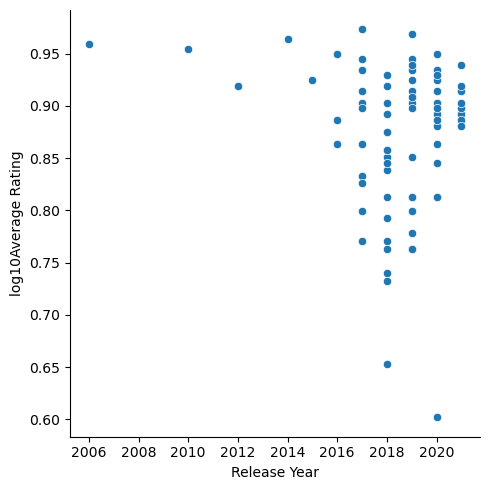

In [17]:
sns.relplot(x='Release Year',y='log10Average Rating',data=netflix)

In [18]:
netflix['log10Release Year'] = np.log10(netflix['Release Year'])

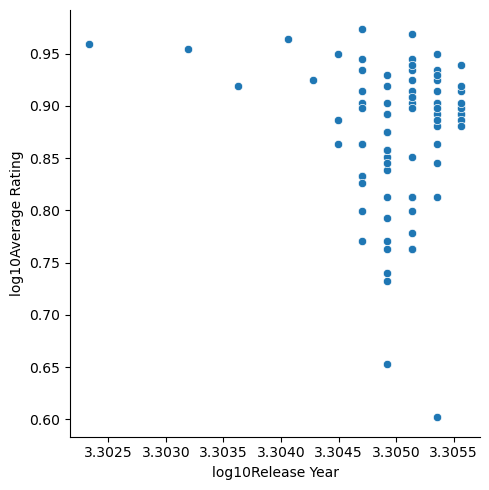

In [19]:
sns.relplot(x='log10Release Year',y='log10Average Rating',data=netflix)

The plots look almost the same. I suppose there might not be a lot of correlation between year and rating.

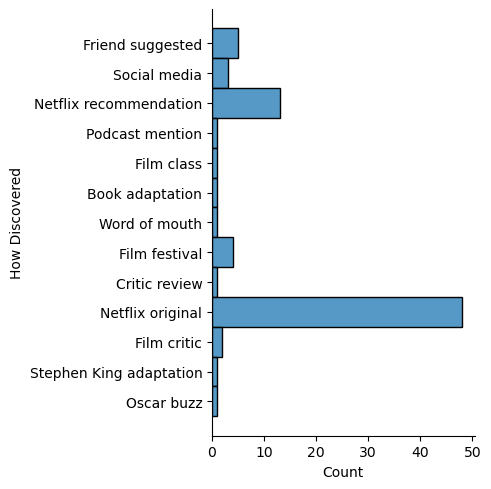

In [31]:
sns.displot(y='How Discovered',data=netflix)

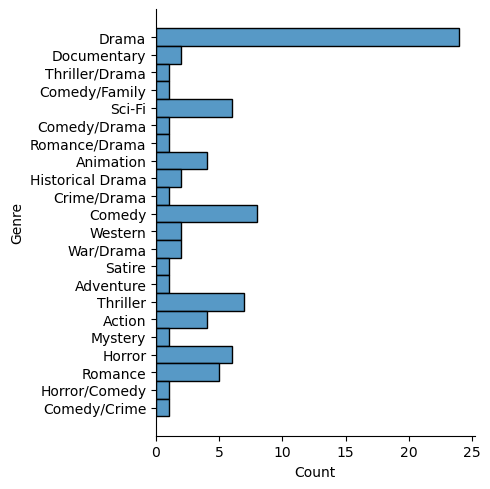

In [32]:
sns.displot(y='Genre',data=netflix)

Drama is overwhelmingly the most common genre of Netflix movie in this sample.

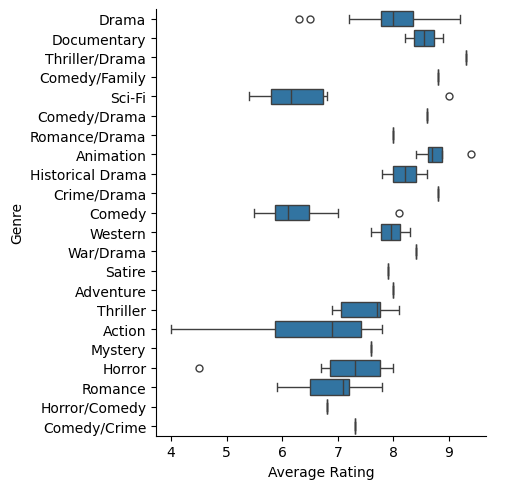

In [33]:
sns.catplot(y='Genre',x='Average Rating',kind='box',data=netflix)

Niche genres seem to have fewer reviews but higher ones. Given the skew of ratings seen earlier, a nonparametric ANOVA would be most appropriate to validate genre as a significant predictor of ratings.

In [35]:
pg.kruskal(data=netflix,dv='Average Rating',between='Genre')

,Source,ddof1,H,p-unc
Kruskal,Genre,21,47.103781,0.000909


Genre does seem to be a significant predictor of average rating.

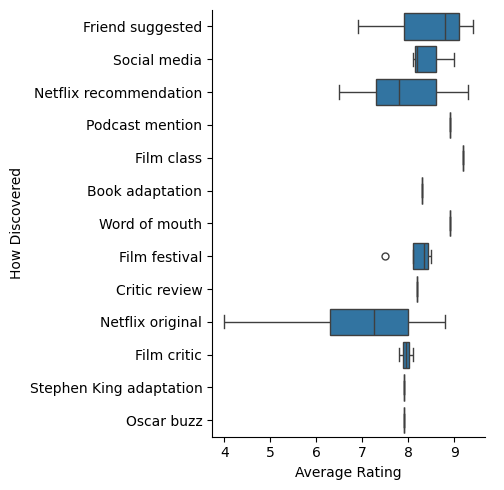

In [36]:
sns.catplot(y='How Discovered',x='Average Rating',kind='box',data=netflix)

In [37]:
pg.kruskal(data=netflix,dv='Average Rating',between='How Discovered')

,Source,ddof1,H,p-unc
Kruskal,How Discovered,12,24.120512,0.019587


Discovery method is also a significant predictor of rating. More highbrow recommendation sources like film classes seem to mean higher ratings and less spread. Netflix originals seem to higher range of ratings. Word of mouth and friend recommendations also seem to predict higher average ratings. Maybe algorithmic recommendation are less reliable than word of mouth and curation? I wonder if there would be similar correlations in other media, like music.

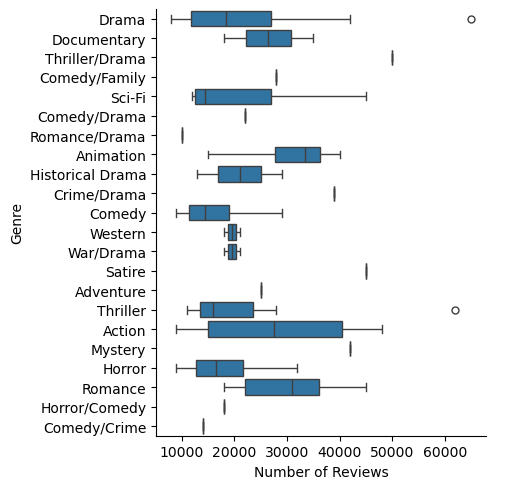

In [40]:
sns.catplot(y='Genre',x='Number of Reviews',kind='box',data=netflix)

In [39]:
pg.kruskal(data=netflix,dv='Number of Reviews',between='How Discovered')

,Source,ddof1,H,p-unc
Kruskal,How Discovered,12,9.874496,0.62697


Discovery method doesn't seem to be a significant predictor of number of reviews.

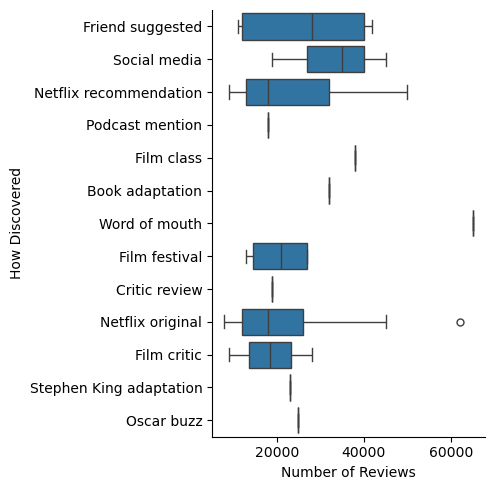

In [38]:
sns.catplot(y='How Discovered',x='Number of Reviews',kind='box',data=netflix)

In [41]:
pg.kruskal(data=netflix,dv='Number of Reviews',between='Genre')

,Source,ddof1,H,p-unc
Kruskal,Genre,21,21.087825,0.453592


Genre also seems not to be a significant predictor of number of reviews. The textual data might be interesting for future sentiment analysis or other natural language processing.